In [246]:
import pandas as pd 

mises_refs_df = pd.read_csv("../data/processed/mises_refs.csv")

In [247]:
mises_refs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7421 non-null   int64  
 1   paper_id                          7421 non-null   int64  
 2   raw                               7421 non-null   object 
 3   context                           7421 non-null   object 
 4   co_cited_count                    7421 non-null   int64  
 5   sentence_id                       7421 non-null   object 
 6   sentence_seq_number               7421 non-null   int64  
 7   author                            7421 non-null   object 
 8   page                              4524 non-null   float64
 9   year                              7164 non-null   float64
 10  title                             7421 non-null   object 
 11  filename                          7421 non-null   object 
 12  senten

In [248]:
mises_refs_df.head()

,Unnamed: 0,paper_id,raw,context,co_cited_count,sentence_id,sentence_seq_number,author,page,year,title,filename,sentence_count,reference_count,source title,similarity,human_action_chapter_by_ref_page,human_action_chapter_number,human_action_chapter_name,human_action_part_number,human_action_part_name
0,0,790,"von Mises, 1949, pp. 1-71)",Utilising the theory of human action developed...,1,_jm2yrry,90,Mises,1.0,1949.0,Towards a theory of the entrepreneurial state,10.1108.eum0000000005692.pdf.grobid.tei.xml,257,71,International Journal of Social Economics,100.000000,0,0,Chapter 0: Introduction,0,Part 0: Introduction
1,1,1842,"(Mises 2011, 1)","Interventionism, for its part, ""seeks to retai...",0,_5k2NTcp,352,Mises,1.0,2011.0,Is the Austrian School Value-Free? On the Depe...,IS-THE-AUSTRIAN-SCHOOL-VALUEFREE-ON-THE-DEPEND...,458,87,Quarterly Journal of Austrian Economics,100.000000,0,0,Chapter 0: Introduction,0,Part 0: Introduction
2,2,1843,"(Mises 2011, 1)","Interventionism, for its part, ""seeks to retai...",0,_WMFnAys,352,Mises,1.0,2011.0,Is the Austrian School Value-Free? On the Depe...,IS-THE-AUSTRIAN-SCHOOL-VALUEFREE-ON-THE-DEPEND...,458,87,Quarterly Journal of Austrian Economics,100.000000,0,0,Chapter 0: Introduction,0,Part 0: Introduction
3,3,1392,"Mises (2011, 1-44)","In a world of national fiat currencies, a bala...",0,_QhFwbBe,63,Mises,1.0,2011.0,Austrian Monetary Theory: Comment on Pascal Sa...,Austrian-Monetary-Theory-Comment-on-Pascal-Sal...,91,22,Quarterly Journal of Austrian Economics,98.245614,0,0,Chapter 0: Introduction,0,Part 0: Introduction
4,4,1354,"(Mises 2009, 1-2)","By the time he finished his studies, however, ...",0,_prAxRdp,117,Mises,1.0,2009.0,Are Structural Fluctuations Natural or Policy-...,Are-structural-fluctuations-natural-or-policyi...,402,94,Quarterly Journal of Austrian Economics,98.437500,0,0,Chapter 0: Introduction,0,Part 0: Introduction


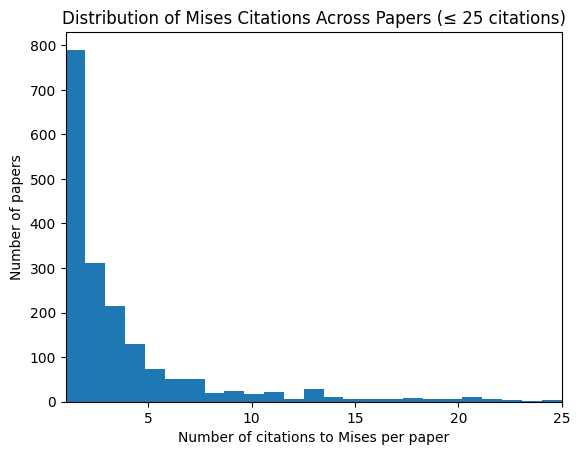

In [249]:
import pandas as pd
import matplotlib.pyplot as plt

# Conta quantas vezes cada paper cita Mises
citations_per_paper = (
    mises_refs_df
        .groupby("paper_id")
        .size()
        .rename("n_citations")
        .reset_index()
)

# Limita a 25 citações
citations_per_paper = citations_per_paper[
    citations_per_paper["n_citations"] <= 25
]

# Histograma
plt.figure()
plt.hist(citations_per_paper["n_citations"], bins=25)
plt.xlabel("Number of citations to Mises per paper")
plt.ylabel("Number of papers")
plt.title("Distribution of Mises Citations Across Papers (≤ 25 citations)")
plt.xlim(1, 25)
plt.show()


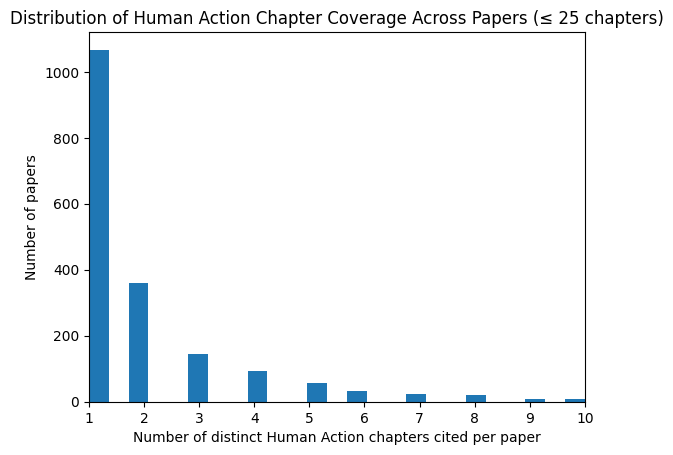

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# Conta quantos capítulos distintos de Human Action cada paper cita
chapters_per_paper = (
    mises_refs_df
        .dropna(subset=["human_action_chapter_number"])
        .groupby("paper_id")["human_action_chapter_number"]
        .nunique()
        .rename("n_distinct_chapters")
        .reset_index()
)

# Limita a 25 capítulos
chapters_per_paper = chapters_per_paper[
    chapters_per_paper["n_distinct_chapters"] <= 10
]

# Histograma
plt.figure()
plt.hist(chapters_per_paper["n_distinct_chapters"], bins=25)
plt.xlabel("Number of distinct Human Action chapters cited per paper")
plt.ylabel("Number of papers")
plt.title("Distribution of Human Action Chapter Coverage Across Papers (≤ 25 chapters)")
plt.xlim(1, 10)
plt.show()


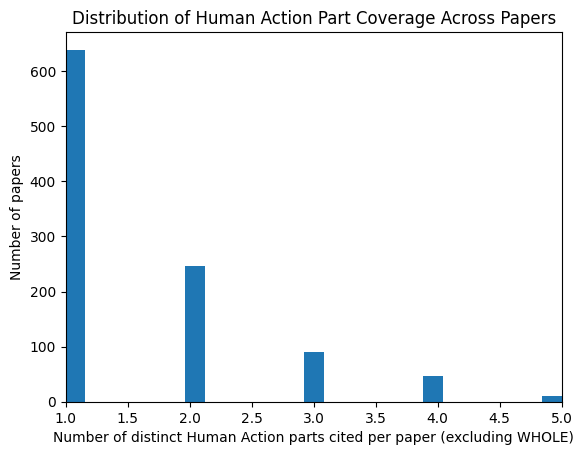

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# Conta quantas partes distintas (≠ WHOLE) cada paper cita
# --------------------------------------------------
parts_per_paper = (
    mises_refs_df[
        mises_refs_df["human_action_part_number"] != "WHOLE"
    ]
        .dropna(subset=["human_action_part_number"])
        .groupby("paper_id")["human_action_part_number"]
        .nunique()
        .rename("n_distinct_parts")
        .reset_index()
)

# --------------------------------------------------
# Limita a 5 partes (segurança)
# --------------------------------------------------
parts_per_paper = parts_per_paper[
    parts_per_paper["n_distinct_parts"] <= 5
]

# --------------------------------------------------
# Histograma
# --------------------------------------------------
plt.figure()
plt.hist(parts_per_paper["n_distinct_parts"], bins=25)
plt.xlabel("Number of distinct Human Action parts cited per paper (excluding WHOLE)")
plt.ylabel("Number of papers")
plt.title("Distribution of Human Action Part Coverage Across Papers")
plt.xlim(1, 5)
plt.show()


In [270]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# --------------------------------------------------
# Parâmetros
# --------------------------------------------------
WHOLE_LABEL = "WHOLE"
K = 20
MIN_SIZE = 2
MAX_SIZE = 2

# --------------------------------------------------
# 1️⃣ Capítulos distintos por paper
# --------------------------------------------------
chapters_by_paper = (
    mises_refs_df
        .dropna(subset=["human_action_chapter_number"])
        .groupby("paper_id")["human_action_chapter_number"]
        .apply(lambda x: set(x))
)

# --------------------------------------------------
# 2️⃣ Classificação dos papers (mutuamente exclusiva)
# --------------------------------------------------
cite_whole = chapters_by_paper[
    chapters_by_paper.apply(lambda chaps: chaps == {WHOLE_LABEL})
]

cite_whole_and_chapter = chapters_by_paper[
    chapters_by_paper.apply(
        lambda chaps: WHOLE_LABEL in chaps and len(chaps) > 1
    )
]

cite_only_chapter = chapters_by_paper[
    chapters_by_paper.apply(
        lambda chaps: WHOLE_LABEL not in chaps
    )
]

# Sanity check
assert (
    len(cite_whole)
    + len(cite_whole_and_chapter)
    + len(cite_only_chapter)
    == len(chapters_by_paper)
)

# --------------------------------------------------
# Função: support e lift para um subconjunto
# --------------------------------------------------
def compute_support_lift(chapter_series, label):
    N_PAPERS = len(chapter_series)

    if N_PAPERS == 0:
        return {}

    # Support individual
    single_counter = Counter()
    for chapters in chapter_series:
        for c in chapters:
            single_counter[c] += 1

    single_support = {
        c: count / N_PAPERS
        for c, count in single_counter.items()
    }

    rows = {}

    for size in range(MIN_SIZE, MAX_SIZE + 1):
        combo_counter = Counter()

        for chapters in chapter_series:
            if len(chapters) < size:
                continue
            for combo in combinations(sorted(chapters), size):
                combo_counter[combo] += 1

        for combo, freq in combo_counter.most_common(K):
            support = freq / N_PAPERS
            denom = np.prod([single_support[c] for c in combo])
            lift = support / denom if denom > 0 else np.nan

            rows[(combo, label)] = {
                "regime": label,
                "combination_size": size,
                "chapter_combination": combo,
                "frequency": freq,
                "support": support,
                "lift": lift
            }

    return rows

# --------------------------------------------------
# 3️⃣ Cálculo para os três regimes
# --------------------------------------------------
rows = {}
rows.update(compute_support_lift(cite_whole, "cite_whole"))
rows.update(compute_support_lift(cite_whole_and_chapter, "cite_whole_and_chapter"))
rows.update(compute_support_lift(cite_only_chapter, "cite_only_chapter"))

# --------------------------------------------------
# 4️⃣ DataFrame final
# --------------------------------------------------
top_combinations_df = (
    pd.DataFrame(rows.values())
      .sort_values(["regime", "lift"], ascending=[True, False])
      .reset_index(drop=True)
)

# --------------------------------------------------
# 5️⃣ Resultado
# --------------------------------------------------
top_combinations_df = top_combinations_df.sort_values(by="lift", ascending=False)

top_combinations_df.head(1000)


,regime,combination_size,chapter_combination,frequency,support,lift
0,cite_only_chapter,2,"(0, 3)",14,0.031461,4.514493
1,cite_only_chapter,2,"(15, 9)",14,0.031461,4.258373
2,cite_only_chapter,2,"(1, 9)",13,0.029213,3.713094
3,cite_only_chapter,2,"(1, 3)",12,0.026966,2.831389
4,cite_only_chapter,2,"(2, 3)",13,0.029213,2.733932
5,cite_only_chapter,2,"(0, 7)",15,0.033708,2.472222
6,cite_only_chapter,2,"(2, 7)",22,0.049438,2.364734
20,cite_whole_and_chapter,2,"(0, 1)",44,0.073456,2.321705
7,cite_only_chapter,2,"(15, 16)",18,0.040449,2.122979
8,cite_only_chapter,2,"(1, 2)",34,0.076404,2.005567


In [252]:
import pandas as pd
from itertools import combinations
from collections import Counter
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

K = 20        # Top K combinações
MAX_SIZE = 4 # Tamanho máximo do itemset

# 1️⃣ Capítulos distintos por paper
chapters_by_paper = (
    mises_refs_df
        .dropna(subset=["human_action_chapter_number"])
        .groupby("paper_id")["human_action_chapter_number"]
        .apply(lambda x: sorted(set(x)))
)

N_PAPERS = len(chapters_by_paper)

# 2️⃣ Support individual (size = 1)
single_counter = Counter()
for chapters in chapters_by_paper:
    for ch in chapters:
        single_counter[ch] += 1

single_support = {
    ch: count / N_PAPERS
    for ch, count in single_counter.items()
}

results = []

# 3️⃣ Itemsets de tamanho 1, 2, 3, ...
for comb_size in range(1, MAX_SIZE + 1):
    counter = Counter()

    for chapters in chapters_by_paper:
        if len(chapters) < comb_size:
            continue
        for combo in combinations(chapters, comb_size):
            counter[combo] += 1

    for combo, freq in counter.most_common(K):
        support_itemset = freq / N_PAPERS

        # Lift
        if comb_size == 1:
            lift = 1.0
        else:
            denom = np.prod([single_support[c] for c in combo])
            lift = support_itemset / denom if denom > 0 else np.nan

        results.append({
            "combination_size": comb_size,
            "chapter_combination": combo,
            "frequency": freq,
            "support": support_itemset,
            "lift": lift
        })

# 4️⃣ Resultado final ordenado por frequência
top_combinations_df = (
    pd.DataFrame(results)
      .sort_values("frequency", ascending=False)
      .reset_index(drop=True)
)

top_combinations_df.head(100)


,combination_size,chapter_combination,frequency,support,lift
0,1,"(WHOLE,)",1393,0.757889,1.000000
1,1,"(2,)",257,0.139826,1.000000
2,1,"(15,)",226,0.122960,1.000000
3,1,"(1,)",211,0.114799,1.000000
4,1,"(14,)",196,0.106638,1.000000
5,2,"(2, WHOLE)",165,0.089771,0.847121
6,1,"(7,)",149,0.081066,1.000000
7,2,"(15, WHOLE)",149,0.081066,0.869906
8,1,"(0,)",148,0.080522,1.000000
9,2,"(1, WHOLE)",129,0.070185,0.806681


In [269]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# --------------------------------------------------
# Parâmetros
# --------------------------------------------------
WHOLE_LABEL = "WHOLE"
K = 20
MIN_SIZE = 2
MAX_SIZE = 2

# --------------------------------------------------
# 1️⃣ Partes distintas por paper
# --------------------------------------------------
parts_by_paper = (
    mises_refs_df
        .dropna(subset=["human_action_part_number"])
        .groupby("paper_id")["human_action_part_number"]
        .apply(lambda x: set(x))
)

# --------------------------------------------------
# 2️⃣ Classificação dos papers (mutuamente exclusiva)
# --------------------------------------------------
cite_whole = parts_by_paper[
    parts_by_paper.apply(lambda parts: parts == {WHOLE_LABEL})
]

cite_whole_and_part = parts_by_paper[
    parts_by_paper.apply(
        lambda parts: WHOLE_LABEL in parts and len(parts) > 1
    )
]

cite_only_part = parts_by_paper[
    parts_by_paper.apply(
        lambda parts: WHOLE_LABEL not in parts
    )
]

# Sanity check
assert (
    len(cite_whole)
    + len(cite_whole_and_part)
    + len(cite_only_part)
    == len(parts_by_paper)
)

# --------------------------------------------------
# Função: support e lift para um subconjunto
# --------------------------------------------------
def compute_support_lift(parts_series, label):
    N_PAPERS = len(parts_series)

    if N_PAPERS == 0:
        return {}

    # Support individual
    single_counter = Counter()
    for parts in parts_series:
        for p in parts:
            single_counter[p] += 1

    single_support = {
        p: count / N_PAPERS
        for p, count in single_counter.items()
    }

    rows = {}

    for size in range(MIN_SIZE, MAX_SIZE + 1):
        combo_counter = Counter()

        for parts in parts_series:
            if len(parts) < size:
                continue
            for combo in combinations(sorted(parts), size):
                combo_counter[combo] += 1

        for combo, freq in combo_counter.most_common(K):
            support = freq / N_PAPERS
            denom = np.prod([single_support[p] for p in combo])
            lift = support / denom if denom > 0 else np.nan

            rows[(combo, label)] = {
                "regime": label,
                "combination_size": size,
                "part_combination": combo,
                "frequency": freq,
                "support": support,
                "lift": lift
            }

    return rows

# --------------------------------------------------
# 3️⃣ Cálculo para os três regimes
# --------------------------------------------------
rows = {}
rows.update(compute_support_lift(cite_whole, "cite_whole"))
rows.update(compute_support_lift(cite_whole_and_part, "cite_whole_and_part"))
rows.update(compute_support_lift(cite_only_part, "cite_only_part"))

# --------------------------------------------------
# 4️⃣ DataFrame final
# --------------------------------------------------
top_combinations_df = (
    pd.DataFrame(rows.values())
      .sort_values(["regime", "lift"], ascending=[True, False])
      .reset_index(drop=True)
)

# --------------------------------------------------
# 5️⃣ Resultado
# --------------------------------------------------

top_combinations_df = top_combinations_df.sort_values(by='lift', ascending=False)

top_combinations_df.head(1000)


,regime,combination_size,part_combination,frequency,support,lift
0,cite_only_part,2,"(5, 6)",6,0.013483,3.178571
1,cite_only_part,2,"(2, 3)",14,0.031461,2.277047
2,cite_only_part,2,"(0, 2)",16,0.035955,2.081871
3,cite_only_part,2,"(3, 5)",4,0.008989,1.854167
20,cite_whole_and_part,2,"(2, 3)",21,0.035058,1.771690
4,cite_only_part,2,"(2, 6)",9,0.020225,1.672932
5,cite_only_part,2,"(3, 6)",7,0.015730,1.545139
6,cite_only_part,2,"(2, 4)",38,0.085393,1.392801
21,cite_whole_and_part,2,"(0, 2)",19,0.031720,1.293295
22,cite_whole_and_part,2,"(1, 2)",75,0.125209,1.276278


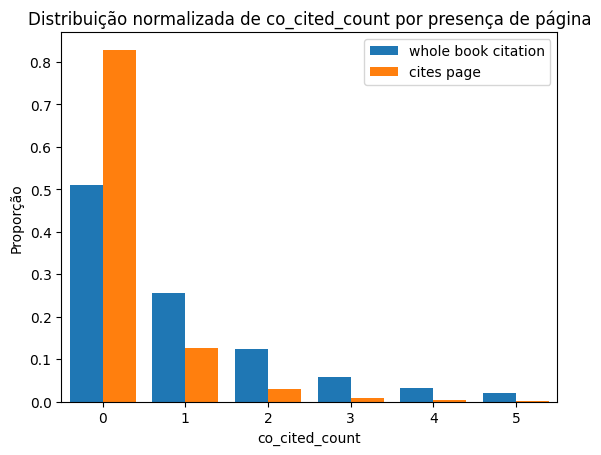

In [254]:
import matplotlib.pyplot as plt
import numpy as np

# Valores possíveis
x_vals = np.arange(6)  # 0,1,2,3,4,5
width = 0.4

# Contagens
counts_no_page = (
    mises_refs_df[mises_refs_df["page"].isna()]["co_cited_count"]
    .value_counts()
    .reindex(x_vals, fill_value=0)
    .sort_index()
)

counts_with_page = (
    mises_refs_df[mises_refs_df["page"].notna()]["co_cited_count"]
    .value_counts()
    .reindex(x_vals, fill_value=0)
    .sort_index()
)

# 🔴 Normalização (cada regime soma 1)
counts_no_page_norm = counts_no_page / counts_no_page.sum()
counts_with_page_norm = counts_with_page / counts_with_page.sum()

# Plot único
plt.figure()
plt.bar(x_vals - width/2, counts_no_page_norm.values, width, label="whole book citation")
plt.bar(x_vals + width/2, counts_with_page_norm.values, width, label="cites page")

plt.xlim(-0.5, 5.5)
plt.xticks(x_vals)
plt.xlabel("co_cited_count")
plt.ylabel("Proporção")
plt.title("Distribuição normalizada de co_cited_count por presença de página")
plt.legend()
plt.show()



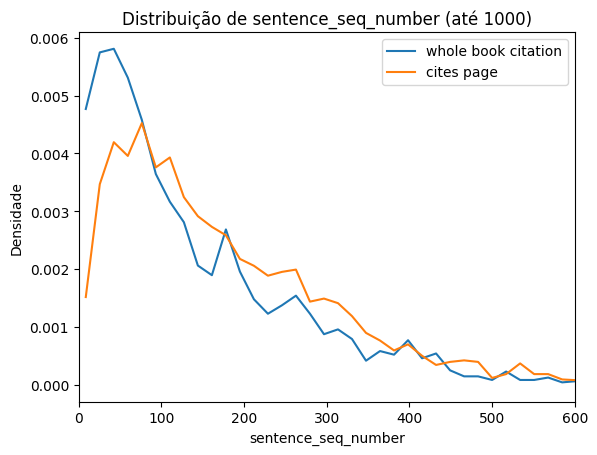

In [255]:
import matplotlib.pyplot as plt
import numpy as np

# Filtra os dois regimes
seq_no_page = mises_refs_df[mises_refs_df["page"].isna()]["sentence_seq_number"].dropna()
seq_with_page = mises_refs_df[mises_refs_df["page"].notna()]["sentence_seq_number"].dropna()

# Limita até 1000
seq_no_page = seq_no_page[seq_no_page <= 1000]
seq_with_page = seq_with_page[seq_with_page <= 1000]

# Bins comuns
bins = np.linspace(0, 1000, 60)

# Calcula histogramas normalizados
hist_no_page, _ = np.histogram(seq_no_page, bins=bins, density=True)
hist_with_page, _ = np.histogram(seq_with_page, bins=bins, density=True)

# Centros dos bins
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot como linhas
plt.figure()
plt.plot(bin_centers, hist_no_page, label="whole book citation")
plt.plot(bin_centers, hist_with_page, label="cites page")

plt.xlim(0, 600)
plt.xlabel("sentence_seq_number")
plt.ylabel("Densidade")
plt.title("Distribuição de sentence_seq_number (até 1000)")
plt.legend()
plt.show()


C:\Users\pedro\AppData\Local\Temp\ipykernel_16232\2423942028.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("bin")


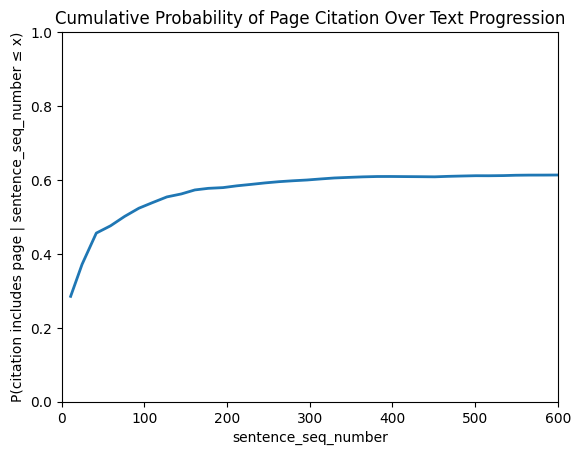

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Copia e limpa
df = mises_refs_df.copy()

# Define se tem page (tratando string vazia)
df["page_filled"] = (
    df["page"].notna() &
    (df["page"].astype(str).str.strip() != "")
)

# Limita sentence_seq_number
df = df[df["sentence_seq_number"].notna()]
df = df[df["sentence_seq_number"] <= 1000]

# Ordena por posição no texto
df = df.sort_values("sentence_seq_number")

# Cálculos acumulados
df["cum_total"] = 1
df["cum_with_page"] = df["page_filled"].astype(int)

df["cum_total"] = df["cum_total"].cumsum()
df["cum_with_page"] = df["cum_with_page"].cumsum()

# Probabilidade acumulada
df["prob_page_cumulative"] = df["cum_with_page"] / df["cum_total"]

# Para suavizar o gráfico, agregamos em bins
bins = np.linspace(0, 1000, 60)
df["bin"] = pd.cut(df["sentence_seq_number"], bins=bins)

plot_df = (
    df.groupby("bin")
      .agg(
          sentence_seq_mean=("sentence_seq_number", "mean"),
          prob_page=("prob_page_cumulative", "mean")
      )
      .dropna()
)

# Plot
plt.figure()
plt.plot(
    plot_df["sentence_seq_mean"],
    plot_df["prob_page"],
    linewidth=2
)

plt.xlim(0, 600)
plt.ylim(0, 1)
plt.xlabel("sentence_seq_number")
plt.ylabel("P(citation includes page | sentence_seq_number ≤ x)")
plt.title("Cumulative Probability of Page Citation Over Text Progression")
plt.show()


C:\Users\pedro\AppData\Local\Temp\ipykernel_16232\1357091020.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("bin")


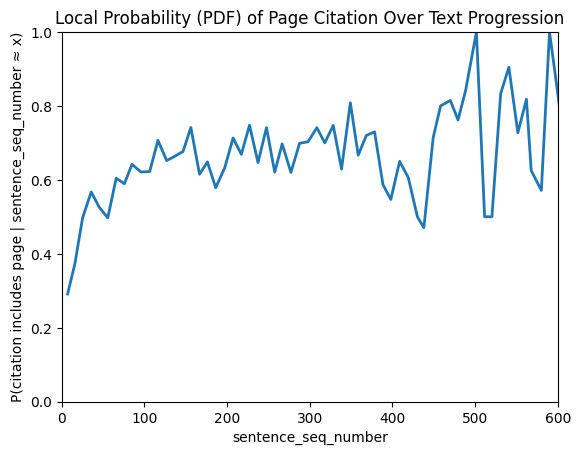

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Copia e limpa
df = mises_refs_df.copy()

# Define se tem page (tratando string vazia)
df["page_filled"] = (
    df["page"].notna() &
    (df["page"].astype(str).str.strip() != "")
)

# Limita sentence_seq_number
df = df[df["sentence_seq_number"].notna()]
df = df[df["sentence_seq_number"] <= 1000]

# Define bins
bins = np.linspace(0, 1000, 100)
df["bin"] = pd.cut(df["sentence_seq_number"], bins=bins)

# Probabilidade local (PDF empírica)
plot_df = (
    df.groupby("bin")
      .agg(
          sentence_seq_mean=("sentence_seq_number", "mean"),
          prob_page=("page_filled", "mean"),  # <-- PDF
          count=("page_filled", "size")
      )
      .dropna()
)

# Plot
plt.figure()
plt.plot(
    plot_df["sentence_seq_mean"],
    plot_df["prob_page"],
    linewidth=2
)

plt.xlim(0, 600)
plt.ylim(0, 1)
plt.xlabel("sentence_seq_number")
plt.ylabel("P(citation includes page | sentence_seq_number ≈ x)")
plt.title("Local Probability (PDF) of Page Citation Over Text Progression")
plt.show()


In [258]:
import pandas as pd

# Garante que page vazia ("") também seja tratada como NA
page_filled = (
    mises_refs_df['page'].notna() &
    (mises_refs_df['page'].astype(str).str.strip() != "")
)

stats = (
    mises_refs_df
        .assign(page_filled=page_filled)
        .groupby('page_filled')
        .agg(
            mean_sentence_seq_number=('sentence_seq_number', 'mean'),
            std_sentence_seq_number=('sentence_seq_number', 'std'),
            count=('sentence_seq_number', 'size')
        )
        .reset_index()
        .assign(
            page_status=lambda df: df['page_filled'].map({
                True: 'With page',
                False: 'Without page'
            })
        )
        .drop(columns='page_filled')
)

stats


,mean_sentence_seq_number,std_sentence_seq_number,count,page_status
0,196.300311,430.687274,2897,Without page
1,197.738064,288.068514,4524,With page


In [259]:
import pandas as pd

K = 50  # ajuste aqui o limiar mínimo de referências

# Garante que page vazia ("") também seja tratada como NA
page_filled = (
    mises_refs_df['page'].notna() &
    (mises_refs_df['page'].astype(str).str.strip() != "")
)

result = (
    mises_refs_df
        .assign(page_filled=page_filled)
        .groupby('source title')
        .agg(
            total_refs=('page_filled', 'size'),
            rows_with_page=('page_filled', 'sum'),
            mean_sentence_seq_number=('sentence_seq_number', 'mean'),
            std_sentence_seq_number=('sentence_seq_number', 'std')
        )
        .query("total_refs > @K")
        .assign(
            perc_with_page=lambda df: 100 * df['rows_with_page'] / df['total_refs']
        )
        .reset_index()
)

# 🔹 Reordena colunas: métricas principais primeiro, sentence_seq_number no final
result = result[
    [
        'source title',
        'total_refs',
        'rows_with_page',
        'perc_with_page',
        'mean_sentence_seq_number',
        'std_sentence_seq_number'
    ]
].sort_values('perc_with_page', ascending=False)

result.head(50)


,source title,total_refs,rows_with_page,perc_with_page,mean_sentence_seq_number,std_sentence_seq_number
15,Social Epistemology,74,71,95.945946,211.445946,96.945139
4,Design and the Creation of Value,57,54,94.736842,172.666667,104.317396
2,Banking and Monetary Policy from the Perspecti...,73,65,89.041096,151.082192,131.588031
11,Research in the History of Economic Thought an...,65,55,84.615385,163.507692,92.630672
7,Journal of Economic Methodology,97,82,84.536082,210.030928,134.513897
9,Journal of the History of Economic Thought,65,53,81.538462,194.784615,108.059083
13,Review of Political Economy,102,83,81.372549,177.764706,150.554498
1,American Journal of Economics and Sociology,55,41,74.545455,154.636364,82.738178
10,Quarterly Journal of Austrian Economics,701,502,71.611983,140.991441,144.090666
3,Cambridge Journal of Economics,84,59,70.238095,129.119048,84.462069


In [260]:
mises_refs_df['human_action_part_name'].unique()

array(['Part 0: Introduction', 'Part 1: Human Action',
       'Part 2: Action Within the Framework of Society',
       'Part 3: Economic Calculation', 'Part 4: Catallatics',
       'Part 5: Social Cooperation without a Market',
       'Part 6: The Hampered Market Economy',
       'Part 7: The Place of Economics in Society', 'WHOLE'], dtype=object)

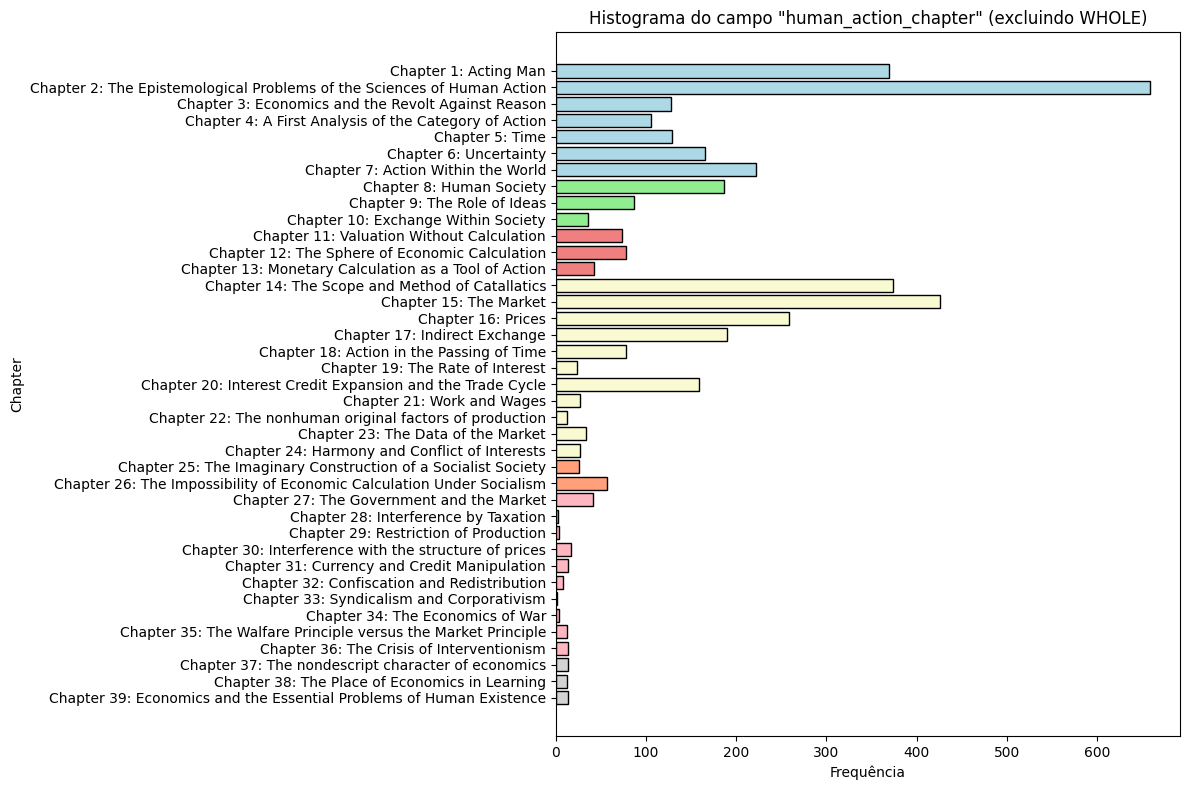

In [261]:
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1️⃣ Filtragem: remove "not found" e "WHOLE"
# --------------------------------------------------
filtered_df = mises_refs_df[
    (mises_refs_df['human_action_chapter_name'] != 'not found') &
    (mises_refs_df['human_action_part_number'] != 'WHOLE')
].copy()

# --------------------------------------------------
# 2️⃣ Converte human_action_part_number para inteiro
# --------------------------------------------------
filtered_df['human_action_part_number'] = (
    filtered_df['human_action_part_number']
    .astype(int)
)

filtered_df['human_action_chapter_number'] = (
    filtered_df['human_action_chapter_number']
    .astype(int)
)

# --------------------------------------------------
# 3️⃣ Mapeamento de cores por part
# --------------------------------------------------
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}

filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# --------------------------------------------------
# 4️⃣ Contagem por capítulo
# --------------------------------------------------
chapter_counts_sorted = (
    filtered_df
        .groupby(
            [
                'human_action_chapter_name',
                'human_action_chapter_number',
                'human_action_part_number',
                'bar_color'
            ]
        )
        .size()
        .reset_index(name='counts')
        .sort_values(by='human_action_chapter_number', ascending=False)
)

# --------------------------------------------------
# 5️⃣ Plot
# --------------------------------------------------
plt.figure(figsize=(12, 8))
plt.barh(
    chapter_counts_sorted['human_action_chapter_name'],
    chapter_counts_sorted['counts'],
    color=chapter_counts_sorted['bar_color'],
    edgecolor='black'
)

plt.title('Histograma do campo "human_action_chapter" (excluindo WHOLE)')
plt.xlabel('Frequência')
plt.ylabel('Chapter')

plt.tight_layout()
plt.savefig('../reports/human_action_chapters.png')
plt.show()


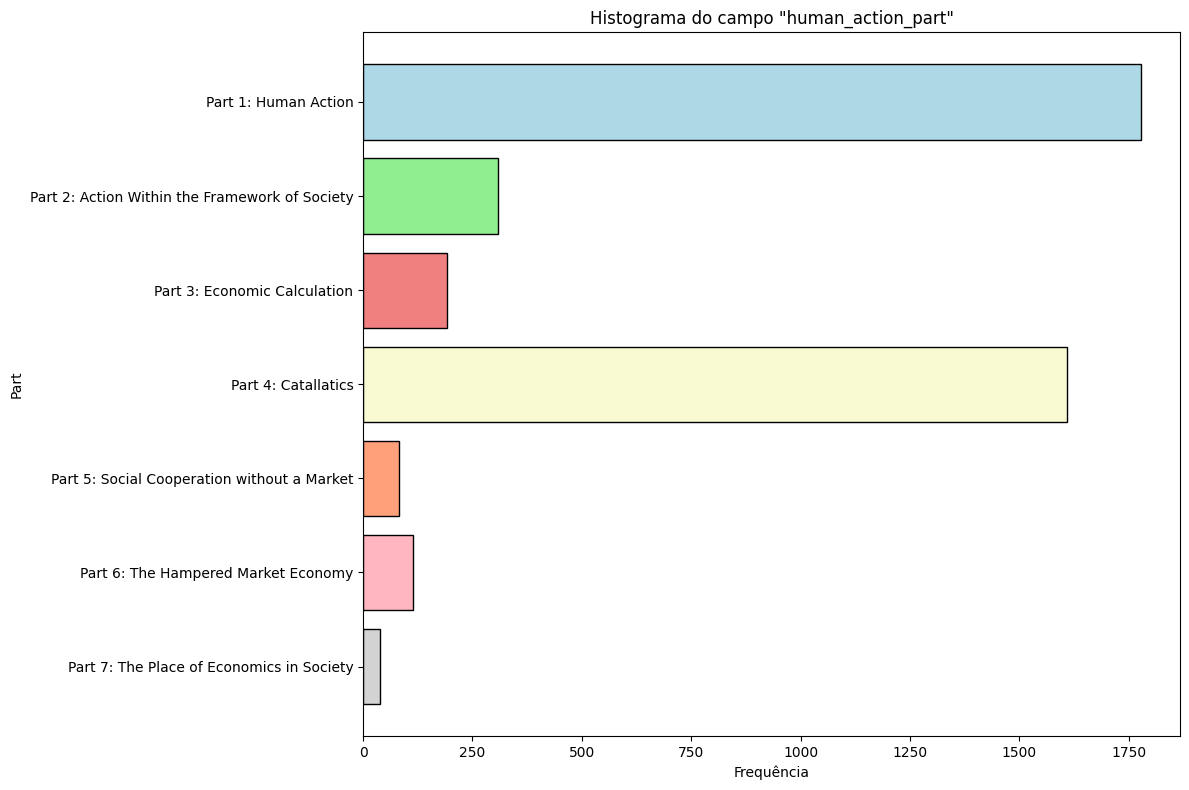

In [262]:
import matplotlib.pyplot as plt

# Simulating the DataFrame (example)
# data = {'human_action_chapter': ['Chapter 3', 'Chapter 1', 'not found', 'Chapter 2', 'Chapter 11', 'Chapter 1', 'not found']}
# mises_refs_df = pd.DataFrame(data)

# --------------------------------------------------
# 1️⃣ Filtragem: remove "not found" e "WHOLE"
# --------------------------------------------------
filtered_df = mises_refs_df[
    (mises_refs_df['human_action_chapter_name'] != 'not found') &
    (mises_refs_df['human_action_part_number'] != 'WHOLE')
].copy()

# --------------------------------------------------
# 2️⃣ Converte human_action_part_number para inteiro
# --------------------------------------------------
filtered_df['human_action_part_number'] = (
    filtered_df['human_action_part_number']
    .astype(int)
)

filtered_df['human_action_chapter_number'] = (
    filtered_df['human_action_chapter_number']
    .astype(int)
)

# Color mapping based on parts
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}


# Assign colors to each chapter based on its part
filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# Group by chapter and count occurrences, then sort by chapter number
chapter_counts_sorted = (
    filtered_df.groupby(['human_action_part_name', 'human_action_part_number', 'bar_color']).size().reset_index(name='counts')
    .sort_values(by='human_action_part_number', ascending=False)
)

# Plot the histogram with adjusted vertical space
plt.figure(figsize=(12, 8))  # Increased height for more vertical space
plt.barh(chapter_counts_sorted['human_action_part_name'], chapter_counts_sorted['counts'], 
         color=chapter_counts_sorted['bar_color'], edgecolor='black')

plt.title('Histograma do campo "human_action_part"')
plt.xlabel('Frequência')
plt.ylabel('Part')

# Adjust layout for better label display
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../reports/human_action_parts.png')

# Show the plot
plt.show()


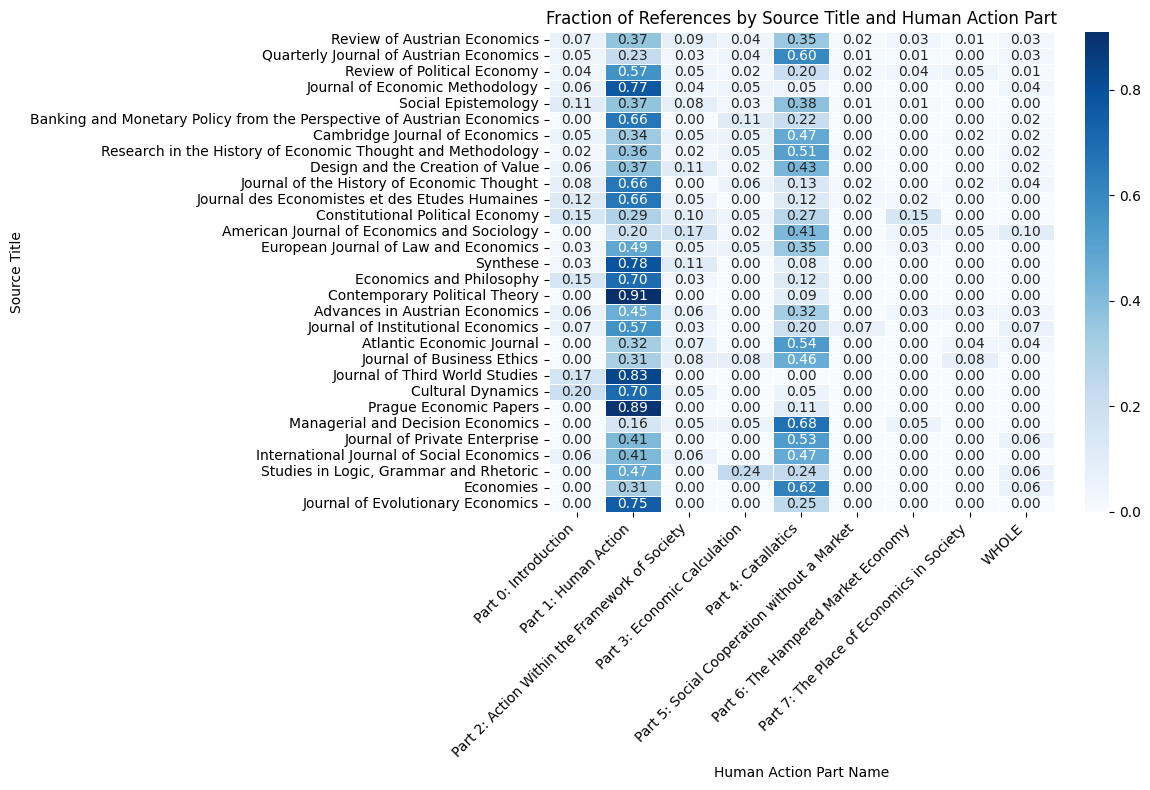

Heatmap saved to ../reports/mises_heatmap.png


In [263]:
'''
prompt:
Write python code that works with mises_refs_df.
Take the top 15 'Source title' and build a heat map showing the fraction of references (rows) that fall on each 'human_action_part_name'.

Sort 'Source title' from the most to the least frequent.

'''

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../reports/"
os.makedirs(output_dir, exist_ok=True)

# Get top 15 'Source title' considering only rows with non-NA page
top_sources = (
    mises_refs_df.loc[mises_refs_df['page'].notna(), 'source title']
    .value_counts()
    .head(30)
    .index
)

filtered_df = mises_refs_df[
    mises_refs_df['source title'].isin(top_sources) &
    mises_refs_df['page'].notna()
]

# Create a crosstab (count table)
count_table = pd.crosstab(
    filtered_df['source title'],
    filtered_df['human_action_part_name'],
    normalize='index'  # Normalize by row to get fractions
)

# Reorder rows from most to least frequent
ordered_index = (
    filtered_df['source title']
    .value_counts()
    .loc[top_sources]
    .index
)

# Reorder the count_table accordingly
count_table = count_table.loc[ordered_index]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(count_table, cmap="Blues", linewidths=0.5, annot=True, fmt=".2f")

plt.title("Fraction of References by Source Title and Human Action Part")
plt.xlabel("Human Action Part Name")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
output_path = os.path.join(output_dir, "mises_heatmap.png")
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


C:\Users\pedro\AppData\Local\Temp\ipykernel_16232\1750616309.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(


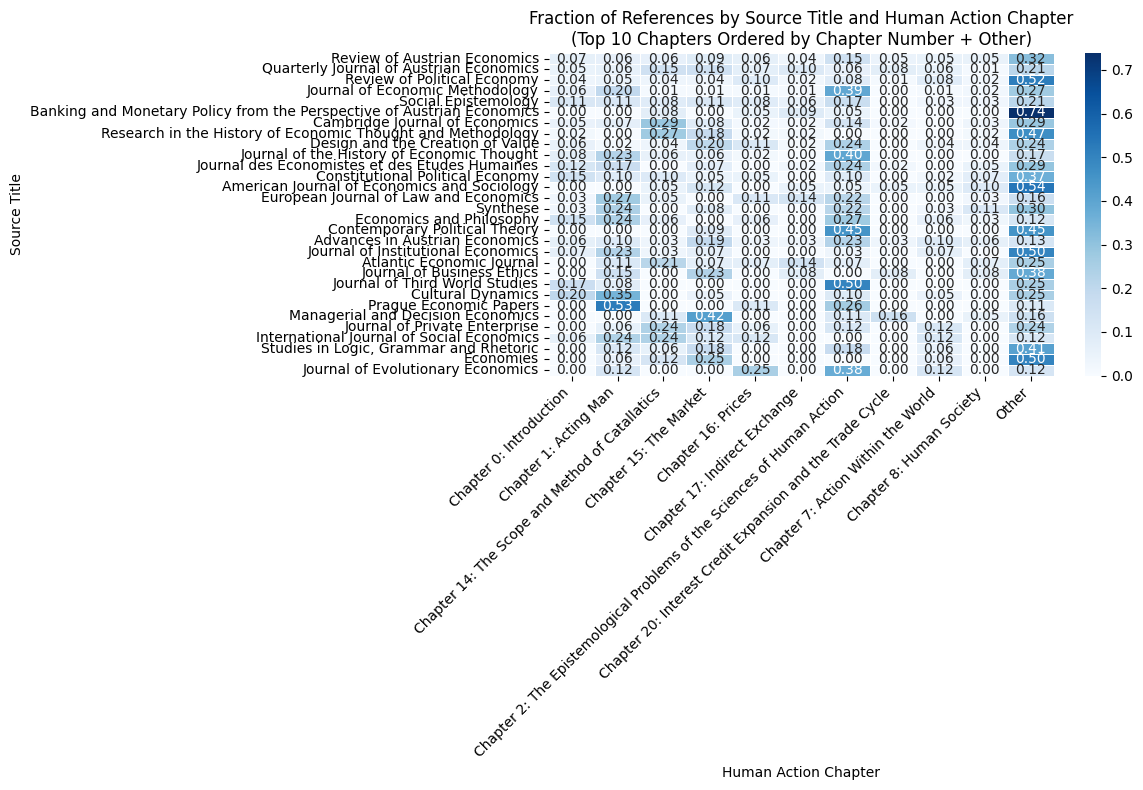

Heatmap saved to ../reports/mises_heatmap_top10_chapters_sorted_by_number.png


In [264]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../reports/"
os.makedirs(output_dir, exist_ok=True)

# Get top Source titles (com page não NA)
top_sources = (
    mises_refs_df.loc[mises_refs_df['page'].notna(), 'source title']
    .value_counts()
    .head(30)
    .index
)

filtered_df = mises_refs_df[
    mises_refs_df['source title'].isin(top_sources) &
    mises_refs_df['page'].notna()
]

# ----------------------------------------
# Top 10 chapters (by frequency)
# ----------------------------------------
top_chapters = (
    filtered_df['human_action_chapter_name']
    .value_counts()
    .head(10)
    .index
)

filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(
    filtered_df['human_action_chapter_name'].isin(top_chapters),
    other="Other"
)

# ----------------------------------------
# Build chapter → chapter_number map
# ----------------------------------------
chapter_number_map = (
    filtered_df.loc[
        filtered_df['chapter_grouped'] != "Other",
        ['human_action_chapter_name', 'human_action_chapter_number']
    ]
    .drop_duplicates()
    .set_index('human_action_chapter_name')['human_action_chapter_number']
    .to_dict()
)

# ----------------------------------------
# Crosstab (frações por Source title)
# ----------------------------------------
count_table = pd.crosstab(
    filtered_df['source title'],
    filtered_df['chapter_grouped'],
    normalize='index'
)

# Reorder rows (Source title)
ordered_index = (
    filtered_df['source title']
    .value_counts()
    .loc[top_sources]
    .index
)
count_table = count_table.loc[ordered_index]

# ----------------------------------------
# Sort columns by chapter_number, keep "Other" last
# ----------------------------------------
sorted_chapters = sorted(
    [c for c in count_table.columns if c != "Other"],
    key=lambda c: chapter_number_map.get(c, float('inf'))
)

if "Other" in count_table.columns:
    sorted_chapters.append("Other")

count_table = count_table[sorted_chapters]

# ----------------------------------------
# Plot heatmap
# ----------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(
    count_table,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)

plt.title(
    "Fraction of References by Source Title and Human Action Chapter\n"
    "(Top 10 Chapters Ordered by Chapter Number + Other)"
)
plt.xlabel("Human Action Chapter")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
output_path = os.path.join(
    output_dir,
    "mises_heatmap_top10_chapters_sorted_by_number.png"
)
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


In [265]:
'''
prompt:
_ é um pandas df com pares (paper_id, human_action_chapter_number). 
Gere código que gera uma matriz em que cada linha é um paper_id e cada coluna conta quantas ocorrências de human_action_chapter_number existem para este paper_id.
'''

import pandas as pd

# Supondo que mises_res_fd já esteja definido como um DataFrame com colunas:
# 'paper_id' e 'human_action_chapter_number'

# Cria a matriz de contagem (cada linha é um paper_id, cada coluna um capítulo, com as contagens)
chapter_matrix = pd.crosstab(
    index=mises_refs_df['paper_id'],
    columns=mises_refs_df['human_action_chapter_number']
)

# Renomeia as colunas para deixar claro que são capítulos
chapter_matrix.columns = [f'chapter_{col}' for col in chapter_matrix.columns]

chapter_matrix.shape



(1838, 41)

C:\Users\pedro\AppData\Local\Temp\ipykernel_16232\2256698900.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(


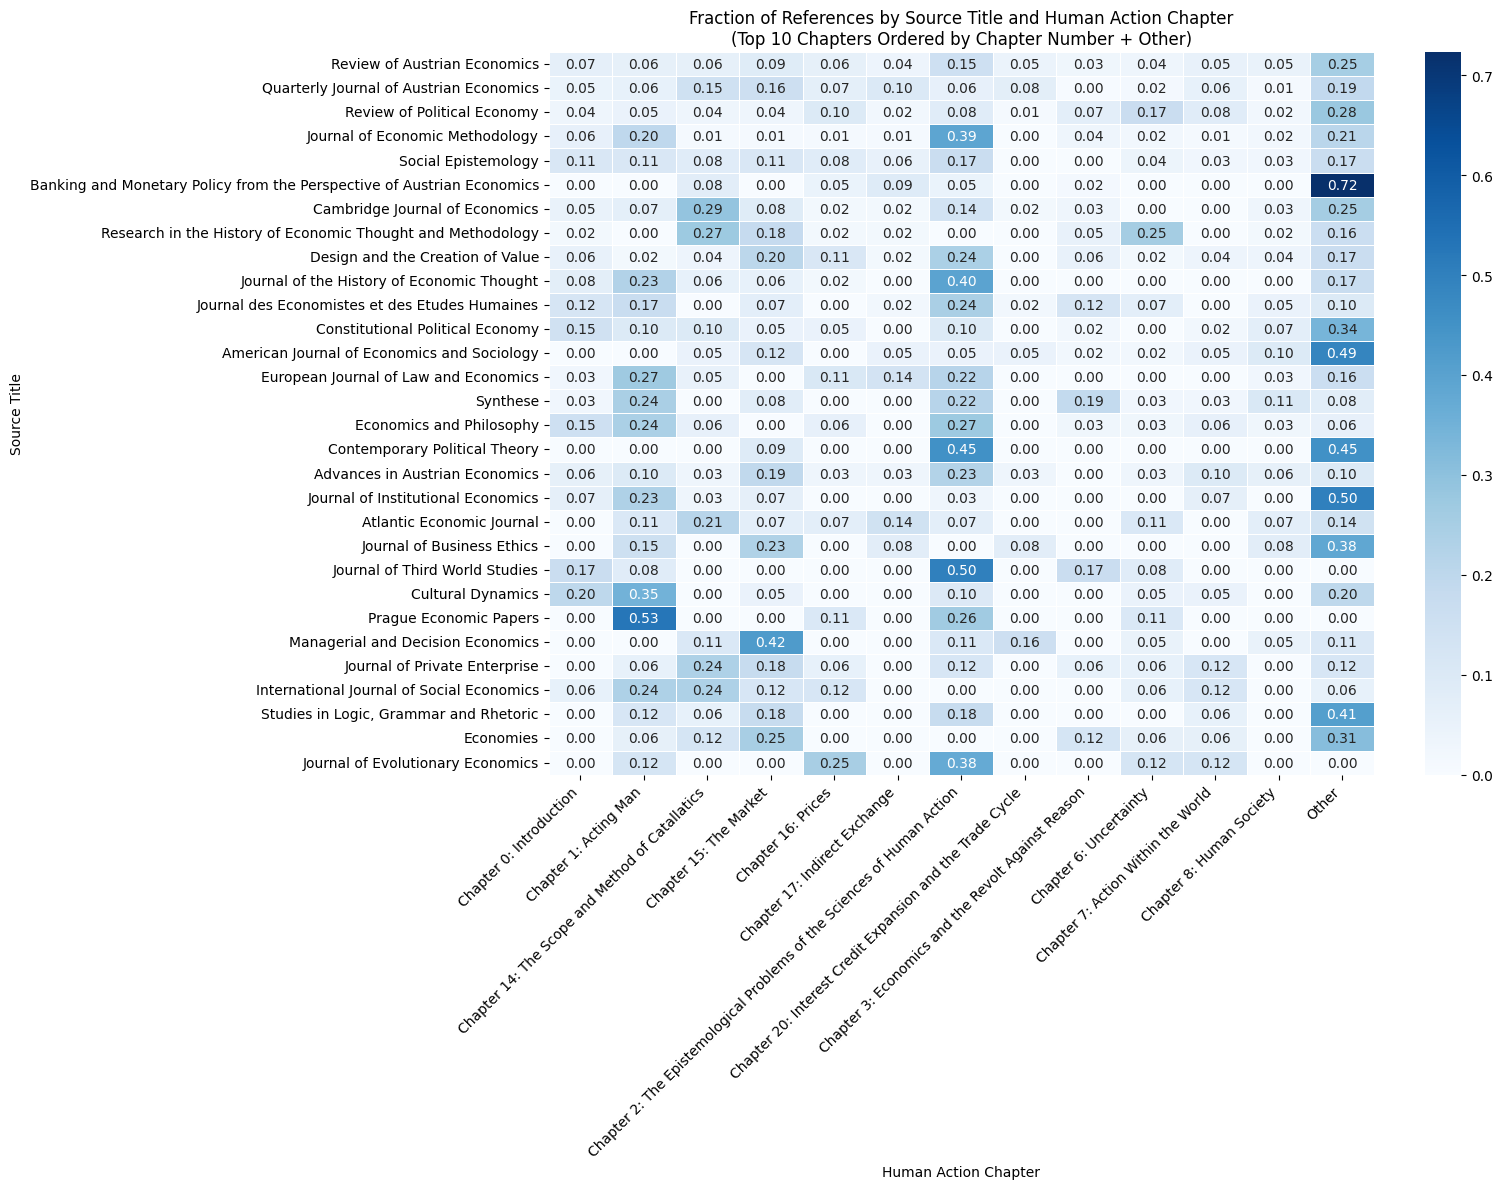

Heatmap saved to ../reports/mises_heatmap_top10_chapters_sorted_by_number.png


In [266]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../reports/"
os.makedirs(output_dir, exist_ok=True)

# Get top Source titles (com page não NA)
top_sources = (
    mises_refs_df.loc[mises_refs_df['page'].notna(), 'source title']
    .value_counts()
    .head(30)
    .index
)

filtered_df = mises_refs_df[
    mises_refs_df['source title'].isin(top_sources) &
    mises_refs_df['page'].notna()
]

# ----------------------------------------
# Top 10 chapters (by frequency)
# ----------------------------------------
top_chapters = (
    filtered_df['human_action_chapter_name']
    .value_counts()
    .head(12)
    .index
)

filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(
    filtered_df['human_action_chapter_name'].isin(top_chapters),
    other="Other"
)

# ----------------------------------------
# Build chapter → chapter_number map
# ----------------------------------------
chapter_number_map = (
    filtered_df.loc[
        filtered_df['chapter_grouped'] != "Other",
        ['human_action_chapter_name', 'human_action_chapter_number']
    ]
    .drop_duplicates()
    .set_index('human_action_chapter_name')['human_action_chapter_number']
    .to_dict()
)

# ----------------------------------------
# Crosstab (frações por Source title)
# ----------------------------------------
count_table = pd.crosstab(
    filtered_df['source title'],
    filtered_df['chapter_grouped'],
    normalize='index'
)

# Reorder rows (Source title)
ordered_index = (
    filtered_df['source title']
    .value_counts()
    .loc[top_sources]
    .index
)
count_table = count_table.loc[ordered_index]

# ----------------------------------------
# Sort columns by chapter_number, keep "Other" last
# ----------------------------------------
sorted_chapters = sorted(
    [c for c in count_table.columns if c != "Other"],
    key=lambda c: chapter_number_map.get(c, float('inf'))
)

if "Other" in count_table.columns:
    sorted_chapters.append("Other")

count_table = count_table[sorted_chapters]

# ----------------------------------------
# Plot heatmap
# ----------------------------------------
plt.figure(figsize=(16, 12))
sns.heatmap(
    count_table,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)

plt.title(
    "Fraction of References by Source Title and Human Action Chapter\n"
    "(Top 10 Chapters Ordered by Chapter Number + Other)"
)
plt.xlabel("Human Action Chapter")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
output_path = os.path.join(
    output_dir,
    "mises_heatmap_top10_chapters_sorted_by_number.png"
)
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


In [ ]:
pip install mlxtend


In [ ]:
pd.set_option('display.max_rows', None)


from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# 1. Transformar a matrix de contagens em booleana (1 se capítulo apareceu, 0 caso contrário)
chapter_bool = chapter_matrix > 0

# 2. Minerar os itemsets frequentes (frequência mínima ajustável com min_support)
frequent_itemsets = apriori(chapter_bool, min_support=0.01, use_colnames=True)


frequent_itemsets.sort_values(by='support', ascending=False).head(100) 


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

pd.set_option('display.max_rows', None)

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

pd.set_option('display.max_rows', None)

# 1. Transformar a matriz de contagens em booleana (1 se capítulo apareceu, 0 caso contrário)
part_bool = part_matrix > 0

# 2. Minerar os itemsets frequentes
frequent_itemsets = apriori(part_bool, min_support=0.01, use_colnames=True)

# 3. Identificar closed itemsets
def is_closed(row, all_itemsets_df):
    current_items = set(row['itemsets'])
    current_support = row['support']
    for _, other_row in all_itemsets_df.iterrows():
        other_items = set(other_row['itemsets'])
        other_support = other_row['support']
        if current_items < other_items and current_support == other_support:
            return False
    return True

frequent_itemsets['is_closed'] = frequent_itemsets.apply(lambda row: is_closed(row, frequent_itemsets), axis=1)

# 4. Filtrar apenas os closed itemsets
closed_itemsets = frequent_itemsets[frequent_itemsets['is_closed']]

# 5. Exibir
frequent_itemsets.sort_values(by='support', ascending=False).head(100)


In [ ]:
part_matrix.head()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Normalizar os dados (importante para PCA)
scaler = StandardScaler()
part_matrix_scaled = scaler.fit_transform(part_matrix)

# 2. Aplicar PCA
pca = PCA()
pca.fit(part_matrix_scaled)

# 3. Mostrar a % de variação explicada por componente
explained_variance_ratio = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance_ratio, start=1):
    print(f'Componente {i}: {var:.2%} da variância explicada')

print('\nComponentes principais (loadings):')
# Cria um DataFrame para mostrar os componentes com nomes das variáveis
loadings_df = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)], 
    index=part_matrix.columns
)
print(loadings_df)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(part_matrix)

# 2. Aplicar PCA e pegar os 2 primeiros componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Preparar o gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Plot dos pontos dos dados nos 2 primeiros PCs
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolor='k')

# 4. Plotar as setas das variáveis originais (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

feature_names = part_matrix.columns

for i, feature in enumerate(feature_names):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1],
             color='r', alpha=0.7, head_width=0.05)
    ax.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, 
            color='r', ha='center', va='center')

# 5. Configurações do gráfico
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variância)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variância)')
ax.set_title('PCA Biplot')
ax.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.tight_layout()
plt.show()
